In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/streamlit assmnt/fruits/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3202 files belonging to 36 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/streamlit assmnt/fruits/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 294 files belonging to 36 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [16]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.4768 - loss: 1.8647 - val_accuracy: 0.7313 - val_loss: 1.0738
Epoch 2/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.5091 - loss: 1.7181 - val_accuracy: 0.7891 - val_loss: 0.9355
Epoch 3/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.5802 - loss: 1.4416 - val_accuracy: 0.8299 - val_loss: 0.8968
Epoch 4/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.6249 - loss: 1.3021 - val_accuracy: 0.8367 - val_loss: 0.7011
Epoch 5/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6662 - loss: 1.1415 - val_accuracy: 0.8537 - val_loss: 0.7042
Epoch 6/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.6898 - loss: 1.0941 - val_accuracy: 0.8333 - val_loss: 0.7297
Epoch 7/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.7522 - loss: 0.8628 - val_accuracy: 0.8741 - val_loss: 0.5908
Epoch 8/32
101/101 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7787 - loss: 0.7793 - val_accu

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

101/101 ━━━━━━━━━━━━━━━━━━━━ 454s 4s/step - accuracy: 0.0301 - loss: 18.6629
Training accuracy: 0.02748282253742218


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.0440 - loss: 19.2826
Validation accuracy: 0.04421768710017204


In [28]:
cnn.save('my_model.keras')

In [27]:
training_history.history #Return Dictionary of history

{'accuracy': [0.4906308650970459,
  0.5349781513214111,
  0.6021236777305603,
  0.6405371427536011,
  0.6792629361152649,
  0.7076826691627502,
  0.7570268511772156,
  0.7776389718055725,
  0.787945032119751,
  0.8041849136352539,
  0.815740168094635,
  0.8429107069969177,
  0.8301061987876892,
  0.8541536331176758,
  0.866333544254303,
  0.8672704696655273,
  0.8822610974311829,
  0.8981886506080627,
  0.9019362926483154,
  0.9113054275512695,
  0.896002471446991,
  0.8935040831565857,
  0.9275453090667725,
  0.9028732180595398,
  0.921923816204071,
  0.9309806227684021,
  0.9253591299057007,
  0.9278575778007507,
  0.9256714582443237,
  0.9312929511070251,
  0.9306683540344238,
  0.9519050717353821],
 'loss': [1.8002852201461792,
  1.6034207344055176,
  1.36097252368927,
  1.261255145072937,
  1.0784064531326294,
  1.005251169204712,
  0.8391165137290955,
  0.7441222667694092,
  0.7074712514877319,
  0.6657940745353699,
  0.6188262104988098,
  0.5370697379112244,
  0.6000359058380127

In [29]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [31]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 94.55782175064087 %


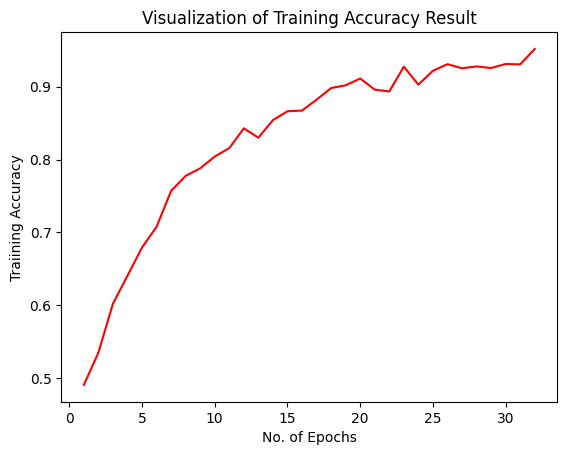

In [32]:
#training_history.history['accuracy']
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

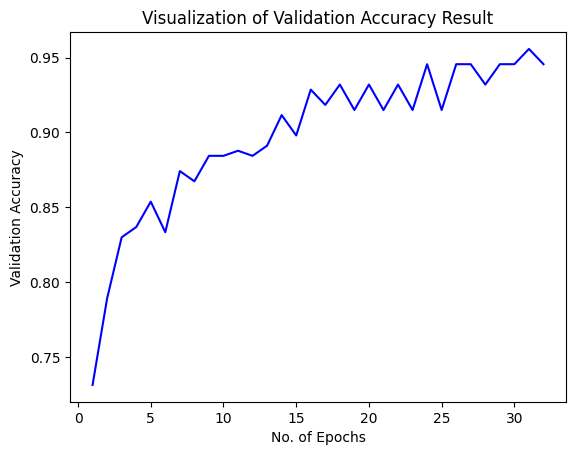

In [33]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/streamlit assmnt/fruits/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


In [35]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.9457 - loss: 0.5343
Test accuracy: 0.941504180431366
